In [2]:
import cv2
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [4]:
base_dir = './data/clothes_category_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [5]:
def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,13))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [9]:
train_sampel = 4908

train_features, train_labels = extract_features(train_dir, train_sampel) #5096

Found 4908 images belonging to 13 classes.


In [10]:
validation_sample = 2454

validation_features, validation_labels = extract_features(validation_dir, validation_sample) # 2548

Found 2454 images belonging to 13 classes.


In [12]:
test_sample = 2452

test_features, test_labels = extract_features(test_dir, test_sample) #2547

Found 2452 images belonging to 13 classes.


In [13]:
train_features = np.reshape(train_features,(train_sampel, 4 * 4 * 512))
validation_features = np.reshape(validation_features,(validation_sample, 4 * 4 * 512))
test_features = np.reshape(test_features,(test_sample, 4 * 4 * 512))

In [14]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_pattern_0424.h5', monitor='val_loss', mode='min', save_best_only=True)

In [16]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                         loss='categorical_crossentropy',
                         metrics=['acc'])

In [17]:
history = model.fit(train_features, train_labels,
                   epochs=500,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels),
                   callbacks=[es,mc])

Train on 4908 samples, validate on 2454 samples
Epoch 1/500
4908/4908 [==============================] - 6s 1ms/step - loss: 2.2922 - acc: 0.2335 - val_loss: 1.8116 - val_acc: 0.4992
Epoch 2/500
4908/4908 [==============================] - 6s 1ms/step - loss: 1.7485 - acc: 0.4374 - val_loss: 1.4816 - val_acc: 0.5962
Epoch 3/500
4908/4908 [==============================] - 6s 1ms/step - loss: 1.4501 - acc: 0.5371 - val_loss: 1.3017 - val_acc: 0.6353
Epoch 4/500
4908/4908 [==============================] - 6s 1ms/step - loss: 1.2699 - acc: 0.5913 - val_loss: 1.2117 - val_acc: 0.6483
Epoch 5/500
4908/4908 [==============================] - 6s 1ms/step - loss: 1.1602 - acc: 0.6233 - val_loss: 1.1224 - val_acc: 0.6703
Epoch 6/500
4908/4908 [==============================] - 6s 1ms/step - loss: 1.0463 - acc: 0.6685 - val_loss: 1.0825 - val_acc: 0.6809
Epoch 7/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.9778 - acc: 0.6866 - val_loss: 1.0477 - val_acc: 0.6879
Epoch 8

4908/4908 [==============================] - 6s 1ms/step - loss: 0.1427 - acc: 0.9715 - val_loss: 0.8735 - val_acc: 0.7543
Epoch 61/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1484 - acc: 0.9682 - val_loss: 0.8615 - val_acc: 0.7531
Epoch 62/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1386 - acc: 0.9670 - val_loss: 0.8853 - val_acc: 0.7567
Epoch 63/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1345 - acc: 0.9719 - val_loss: 0.8731 - val_acc: 0.7531
Epoch 64/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1303 - acc: 0.9723 - val_loss: 0.8549 - val_acc: 0.7563
Epoch 65/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1309 - acc: 0.9719 - val_loss: 0.8724 - val_acc: 0.7514
Epoch 66/500
4908/4908 [==============================] - 6s 1ms/step - loss: 0.1215 - acc: 0.9758 - val_loss: 0.8608 - val_acc: 0.7584
Epoch 67/500
4908/4908 [==============================] - 6s 

In [18]:
model.save('category0424_9875.h5')

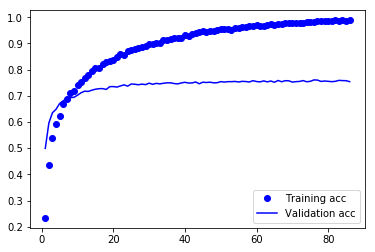

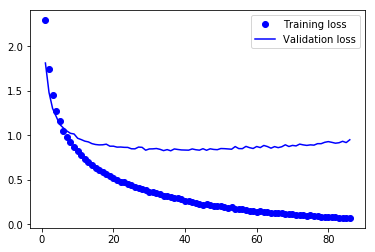

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
# plt.tilte('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.tilte('Training and validation loss')
plt.legend()

plt.show()